# **tcrdist-based clustering using DBSCAN**

**NOTE:** the use of this notebook requires the installation of the *tcrdist3* package.
```
pip install tcrdist3
```
to install the package.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('/home/sebastiaan/PhD/Repositories/clusTCR/')

from tcrdist.repertoire import TCRrep
from clustcr.input.datasets import vdjdb_tcrdist_small, vdjdb_epitopes_small
from clustcr.clustering.metrics import Metrics
from sklearn.cluster import DBSCAN

In [4]:
# plot styling
plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.rc('font', family='serif')
sns.set_palette('Set1')
sns.set_context('paper', font_scale=1.3)    # single-column figure

In [3]:
data = vdjdb_tcrdist_small()
data = data.drop_duplicates()

# Calculate pw distances
tr = TCRrep(cell_df = data,
            organism = 'human',
            chains = ['beta'],
            db_file='alphabeta_gammadelta_db.tsv')

# Pairwise distance matrix
d = tr.pw_cdr3_b_aa

In [5]:
# Clustering
res = []
for dist in [*range(5,251,5)]:
    print('DBSCAN clustering with eps: %s' % dist)
    clustering = DBSCAN(eps=dist, min_samples=2, n_jobs=-1).fit(d)
    labels = clustering.labels_
    print(labels)
    
    # Evaluation of clustering results
    data_copy = data.copy()
    data_copy['cluster'] = labels
    data_copy = data_copy.rename(columns={'cdr3_b_aa':'CDR3'})
    data_copy = data_copy[data_copy['cluster']!=-1]
    
    epitopes = vdjdb_epitopes_small()
    metrics = Metrics(data_copy, epitopes, name='tcrdist')
    summ = metrics.summary()
    summ['threshold'] = [dist] * len(summ)
    res.append(summ)
    
res = pd.concat(res)
res.to_csv("../results/trdist_dbscan.tsv", sep="\t", index=False)

DBSCAN clustering with eps: 5
[ -1  -1  -1 ...  -1  65 194]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 10
[ -1  -1  -1 ...  -1  65 194]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 15
[ -1  -1  -1 ...  -1  65 194]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 20
[ -1  -1  -1 ...  -1  66 195]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 25
[ -1  -1  -1 ...  -1  66 194]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 30
[ -1  -1  -1 ...  -1  66 194]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 35
[ -1  -1  -1 ...  -1  70 194]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 40
[ -1  -1  -1 ...  -1  71 198]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 45
[ -1  -1  -1 ...  -1  72 201]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 50
[ -1  -1  -1 ...  -1  75 206]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 55
[ -1  -1  -1 ...  -1  77 207]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 60
[ -1   0  -1 ...  -1  79 212]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 65
[ -1   0  -1 ...  -1  83 223]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 70
[-1  0 -1 ... -1 86 14]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 75
[-1  0 -1 ... -1 86 15]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 80
[-1  0 -1 ... -1 95 15]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 85
[ -1   0  -1 ...  -1 101  18]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 90
[-1  0 -1 ... -1 60 22]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 95
[-1  0  1 ... -1 67 26]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 100
[-1  0  1 ... -1 71 28]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 105
[-1  0  1 ... -1 78 30]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 110
[-1  0  1 ... -1 79 32]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 115
[-1  0  1 ... -1 79 34]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 120
[-1  0  1 ... -1 86 37]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 125
[-1  0  1 ... -1 89 37]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 130
[-1  0  1 ... -1 91 40]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 135
[-1  0  1 ... -1 99 44]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 140
[ -1   0   1 ...  -1 104  45]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 145
[ -1   0   1 ...  -1 108  45]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 150
[  0   1   2 ...  43 117  52]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 155
[  0   1   2 ...  46 122  57]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 160
[  0   1   2 ...  52 124  65]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 165
[  0   1   2 ...  57 117   5]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 170
[  0   1   2 ...  56 116   5]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 175
[ 0  1  2 ... 50 98  4]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 180
[ 0  1  1 ... 38 85  3]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 185
[ 0  1  1 ... 34 75  1]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 190
[ 0  1  1 ... 29 65  1]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 195
[ 0  0  0 ... 24 57  0]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 200
[ 0  0  0 ... 19 51  0]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 205
[ 0  0  0 ... 11 38  0]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 210
[ 0  0  0 ...  0 34  0]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 215
[ 0  0  0 ...  0 28  0]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 220
[ 0  0  0 ...  0 26  0]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 225
[ 0  0  0 ...  0 22  0]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 230
[ 0  0  0 ...  0 16  0]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 235
[ 0  0  0 ...  0 13  0]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 240
[ 0  0  0 ...  0 10  0]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 245
[0 0 0 ... 0 9 0]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 250
[0 0 0 ... 0 8 0]


/home/sebastiaan/miniconda3/envs/clustcr/lib/python3.6/site-packages/clustcr/clustering/metrics.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


In [5]:
res = pd.read_csv("results/trdist_dbscan.tsv", sep="\t")

In [6]:
res = res[res['threshold']<=190]

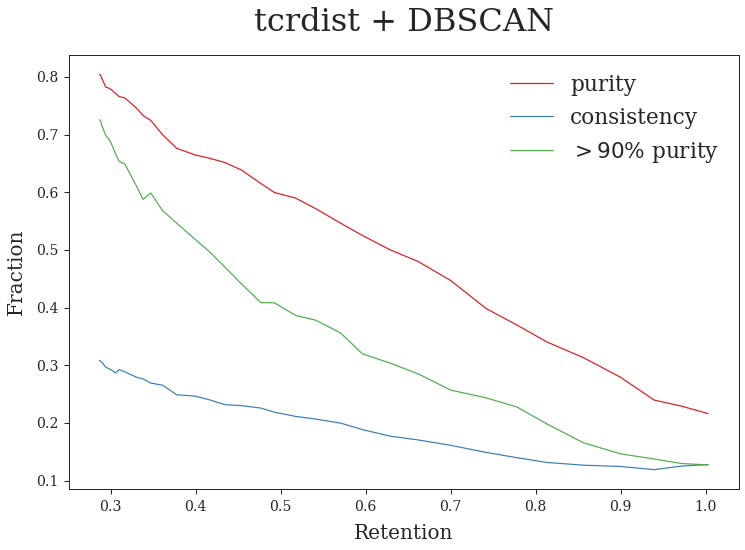

In [13]:
purity = res[res['metrics']=='purity']
purity = purity.actual

purity_90 = res[res['metrics']=='purity_90']
purity_90 = purity_90.actual

retention = res[res['metrics']=='retention']
retention = retention.actual

consistency = res[res['metrics']=='consistency']
consistency = consistency.actual

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(retention, purity, label='purity')
ax.plot(retention, consistency, label='consistency')
ax.plot(retention, purity_90, label='$> 90$% purity')

ax.set_title('tcrdist + DBSCAN', fontsize = 32, y=1.04)
ax.set_xlabel('Retention', fontsize = 20, labelpad = 10)
ax.set_ylabel('Fraction', fontsize = 20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.legend(fontsize = 'xx-large')

fig.savefig("results/figures/tcrdist_dbscan.eps", format="eps")